A notebook to determine growth rates on constant-slope strings

In [15]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats

(10001,)


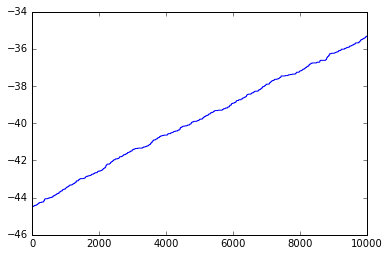

0.00092


In [18]:
N = 100
Steps = 10000
S = reset_S(N,-.9)
heights = np.array([np.mean(S)])
for i in range(Steps):
    S = random_update_S(S)
    heights = np.append(heights, np.mean(S))
# print(np.shape(heights))
slope, intercept,_,_,_ = stats.linregress(ts[20000:],heights[20000:])

plt.plot(np.arange(Steps+1), heights)
plt.show()
print((heights[-1] - heights[0]) / Steps)

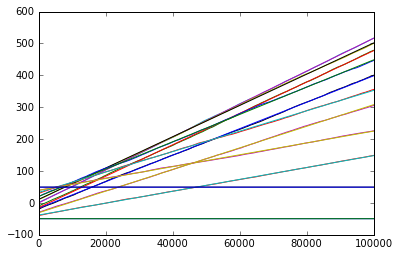

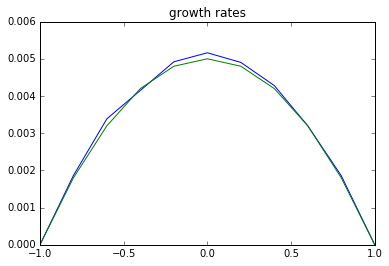

In [35]:
N = 100
Steps = 100000
slopes = np.array([])
ts = np.arange(Steps+1)

for m in range(-10,12,2):
    S = reset_S(N, m/10)
    heights = np.array([np.mean(S)])
    for i in range(Steps):
        S = random_update_S(S)
        heights = np.append(heights, np.mean(S))
        
    plt.plot(ts, heights)
    slope, intercept,_,_,_ = stats.linregress(ts[20000:],heights[20000:])
    plt.plot(ts, slope * ts + intercept)
    slopes = np.append(slopes, slope)
plt.show()

# Growth Rate
plt.plot(np.arange(-1,1.2,.2), slopes)
plt.plot(np.arange(-1,1.2,.2), (1-np.arange(-1,1.2,.2)*np.arange(-1,1.2,.2))/(2*N))
plt.title("growth rates")
plt.show()

0.000511724234383


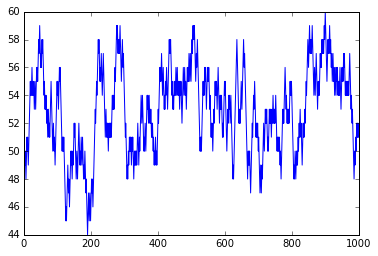

In [52]:
N = 1000
Steps = 100000
S = reset_S(N,0)
heights = np.array([np.mean(S)])
for i in range(Steps):
    S = random_update_S(S)
    heights = np.append(heights, np.mean(S))
ts = np.arange(Steps+1)
slope, intercept,_,_,_ = stats.linregress(ts[20000:],heights[20000:])
print(slope)

plt.plot(np.arange(N), S)
plt.show()